# Preprocessing rapide des données initiales :

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
path=""
df=pd.read_csv(path+"gym_members_exercise_tracking.csv",sep=",",header=0)
# Vérification du contenu
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [55]:
df.info()
df.describe()
print(type(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

On transforme les données de type 'object' en variables catégoriques :

In [56]:
categoriques = ['Experience_Level', 'Workout_Frequency (days/week)','Gender','Workout_Type'] 
df[categoriques] = df[categoriques].astype("category")
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


On utilise le one-hot encoding pour les variables catégoriques afin de les utiliser dans l'entraînement des modèles:

In [57]:
data = pd.get_dummies(df, columns=categoriques)  # Etape de one-hot encoding pour les variables catégoriques
boolean_col = data.select_dtypes(include = 'bool').columns
data[boolean_col] = data[boolean_col].astype(int)
data.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,Workout_Frequency (days/week)_2,Workout_Frequency (days/week)_3,Workout_Frequency (days/week)_4,Workout_Frequency (days/week)_5,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,...,0,0,1,0,0,1,0,0,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,...,0,0,1,0,1,0,0,1,0,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,...,0,0,1,0,1,0,1,0,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,...,0,1,0,0,0,1,0,0,1,0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,...,0,1,0,0,0,1,0,0,1,0


# Séparation des données pour l'apprentissage des modèles :

Afin d'entraîner correctement les différents modèles et de décider de la manière la plus rigoureuse possible quel modèle peut être considéré 
comme le plus performant pour prédire la valeur de la variable 'Calories_Burned', on divise le jeu de données en un jeu d'entraînement et un jeu de test (à l'aide de la fonction 'train_test_split'). On ajoute un 'random_state' pour que le découpage des données soit identique pour chaque modèle.
On commence par standardiser les données d'entraînement d'un côté et de test de l'autre (étape avec StandardScaler()), afin que le modèle n'ait aucune connaissance des caractéristiques des données de test.
Afin de conserver suffisamment de données pour l'évaluation des modèles, on considère un ratio 80/20 pour les données d'entraînement et les données de test.
Le but est d'entraîner chacun des modèles sur le jeu d'entraînement en utilisant une méthode de validation croisée (utilisation des fonctions KFold() et GridSearchCV()). On utilise (dans un premier temps) une validation croisée à 10 modalités.
Enfin, on évalue les modèles sur 3 métriques différentes: le $R^2$, le RMSE (root mean squared error) et le MAE (mean absolute error).

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE, r2_score, mean_absolute_error as MAE

scaler = StandardScaler() # Pour normaliser les données 

X = data.drop("Calories_Burned", axis=1).values 
y = data["Calories_Burned"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_scaled = scaler.fit_transform(X_train)  # Normalisation des données d'apprentissage
X_test_scaled = scaler.transform(X_test) # Normalisation des données test
kf = KFold(n_splits = 10, shuffle = True, random_state = 42) # Pour la validation croisée (à 10 modalités ici)

# I) Entraînement de modèles linéaires classiques (régression linéaire simple, Ridge, Lasso) : 

In [60]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

# 1) Régression linéaire simple : 

Dans le cas de la régression linéaire simple, on n'a aucun hyperparamètre à calibrer. On peut donc entraîner simplement le modèle (sans faire intervenir la validation croisée).

In [67]:
Lin = LinearRegression()
Lin.fit(X_train_scaled, y_train)
y_pred_lin = Lin.predict(X_test_scaled)

In [149]:
r2_lin = r2_score(y_pred_lin, y_test)
rmse_lin = np.sqrt(MSE(y_pred_lin, y_test))
mae_lin = MAE(y_pred_lin, y_test)
print(f"Scores de la régression linéaire simple: R2 : {r2_lin:.4f} | RMSE : {rmse_lin:.4f} | MAE : {mae_lin:.4f}")

Scores de la régression linéaire simple: R2 : 0.9800 | RMSE : 40.1625 | MAE : 30.7036


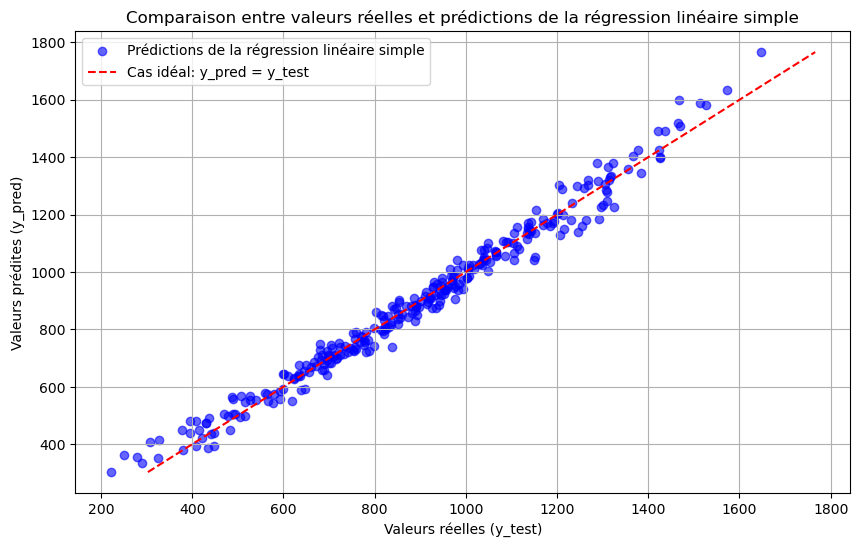

In [69]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_lin, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions de la régression linéaire simple')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Comparaison entre valeurs réelles et prédictions de la régression linéaire simple')
plt.legend()
plt.grid(True)
plt.show()

On observe que les valeurs prédites par le modèle collent assez fidèlement aux valeurs réelles (représentées par la droite rouge sur la 
figure précédente). Néanmoins, les valeurs extrêmes de la droite semblent moins bien prédites. On peut supposer que ceci provient du fait que le nombre d'observations associé à ces valeurs extrêmes est bien plus faible que pour les valeurs moyennes, ce qui nuit à l'entraînement du modèle.
On peut facilement le vérifier :

In [158]:
print(type(data_cb))
data_cb = data["Calories_Burned"]
print(data_cb[data_cb > 1000].count() / len(data_cb))
print(data_cb[data_cb > 1200].count() / len(data_cb))
print(data_cb[data_cb < 600].count() / len(data_cb))

<class 'pandas.core.series.Series'>
0.34224049331963
0.13566289825282632
0.13566289825282632


On observe qu'il y a le même nombre d'observations qui prennent des valeurs inférieures à 600 et supérieures à 1200 (valeurs extrêmes) pour la variable 'Calories_Burned'. Ces deux 
catégories représentent chacune à peu près 13,6% des données, ce qui pourrait effectivement être insuffisant pour entraîner correctement la régression linéaire sur ces plages de valeurs, et donc expliquer en partie les faiblesses des prédictions de ce modèle dans ces zones.
A titre de comparaison avec les autres modèles, on peut calculer les erreurs du modèle seulement sur les valeurs extrêmes:

In [164]:
mask_1 = y_test > 1200
mask_2 = y_test < 600
y_test_1 = y_test[mask_1]
y_pred_lin_1 = y_pred_lin[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_lin_2 = y_pred_lin[mask_2]
r2_lin_1 = r2_score(y_pred_lin_1, y_test_1)
r2_lin_2 = r2_score(y_pred_lin_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_lin_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_lin_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.7178
R2 pour les variables à valeurs < 600 : 0.7707


On voit bien que les erreurs commises par le modèle sur cette sous-catégorie des données est bien supérieure à l'erreur générale calculée 
précédemment.

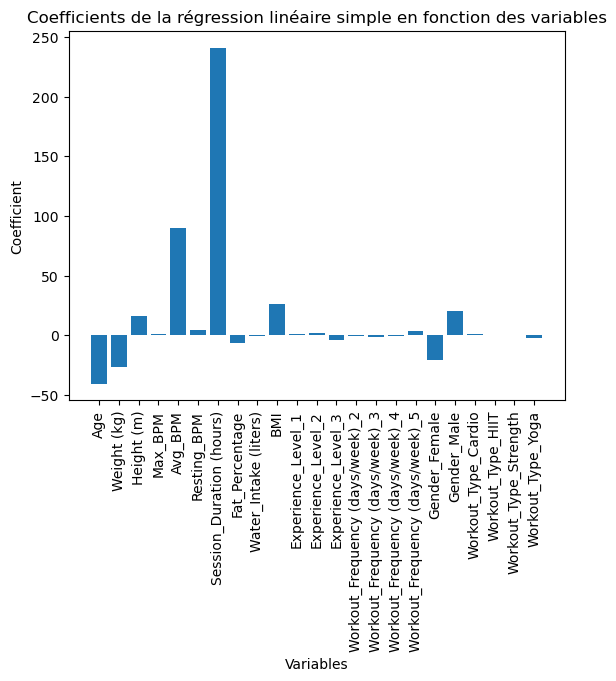

In [72]:
columns = data.drop("Calories_Burned", axis=1).columns
coefficients_lin = Lin.coef_

plt.bar(columns, coefficients)
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients de la régression linéaire simple en fonction des variables')
plt.xticks(rotation=90)
plt.show()

D'après le diagramme en barres ci-dessus, les principales variables explicatives de la variable 'Calories_Burned' sont les variables 'Session_Duration (hours)' (en tout premier lieu) et 'Avg_BPM'. Dans une plus faible mesure, on retrouve aussi les variables 'Age', 'Weight (kg)', 'BPI' ainsi que le sexe du pratiquant ('Gender_Male ou 'Gender_Female'). Les autres variables interviennent très peu.
Ceci est cohérent avec l'analyse exploratoire des données (menée en R) et les résultats de la PCA, qui montre la forte corrélation entre 'Calories_Burned' et 'Session_Duration (hours)' et avec 'Avg_BPM'.
Les variables 'BMI' et 'Weight (kg)' sont également modéremment corrélées à la variable d'intérêt, ce qui se retrouve aussi au niveau des coefficients (dans une moindre mesure que pour les variables déjà citées).
En revanche, la variable 'Fat_Percentage', qui est négativement corrélée à 'Calories_Burned', ne se retrouve quasiment pas dans les variables explicatives du modèle.

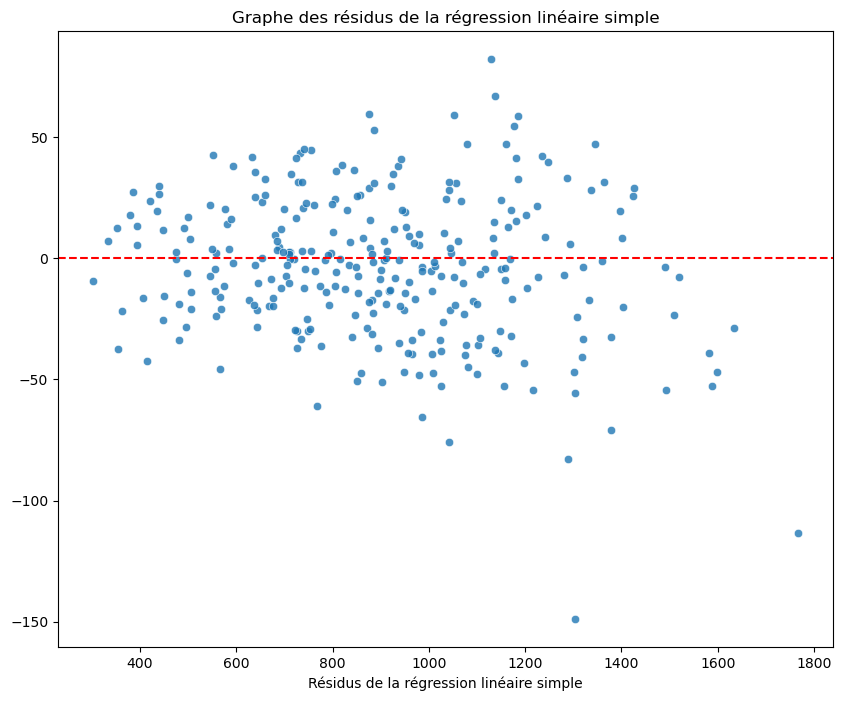

In [71]:
lin_residues = y_pred_lin - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = svr_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus de la régression linéaire simple')
plt.title('Graphe des résidus de la régression linéaire simple')
plt.show()

# 2) Régression Ridge :

On entraîne ensuite une régression Ridge, cette fois-ci par validation croisée à cause du coefficient 'alpha' à calibrer. Le paramètre 'alpha'
correspondant permet de moduler un terme de pénalisation qui fait intervenir la norme des coefficients au carré (type norme L2 des coefficients).

In [83]:
Ridge_init = Ridge()
dict_alpha = {"alpha":np.linspace(0.0001,10,4)}
Ridge_cv = GridSearchCV(Ridge_1, dict_alpha, cv=kf)
Ridge_cv.fit(X_train_scaled, y_train)

print("Ridge best alpha parameter: {}".format(Ridge_cv_1.best_params_))
print("Ridge best performance: {}".format(Ridge_cv_1.best_score_))

Ridge best alpha parameter: {'alpha': 0.0001}
Ridge best performance: 0.9771217622052706


In [84]:
alpha = Ridge_cv.best_params_["alpha"]
Ridge_final = Ridge(alpha = alpha)
Ridge_final.fit(X_train_scaled, y_train)

y_pred_ridge = Ridge_final.predict(X_test_scaled)
r2_ridge = r2_score(y_pred_ridge, y_test)
rmse_ridge = np.sqrt(MSE(y_pred_ridge, y_test))
mae_ridge = MAE(y_pred_ridge, y_test)

print(f"Scores de la régression Ridge: R2 : {r2_ridge:.4f} | RMSE : {rmse_ridge:.4f} | MAE : {mae_ridge:.4f}")

Scores de la régression Ridge: R2 : 0.9800 | RMSE : 40.1625 | MAE : 30.7036


On n'observe aucune différence avec les scores obtenus pour la régression linéaire simple, ce qui est cohérent avec le fait
que le coefficient de pénalisation 'alpha' sélectionné par validation croisée est très (très) faible. Autrement dit, c'est comme on appliquait
une seconde fois la régression linéaire simple. On peut aussi vérifier ceci sur les valeurs extrêmes: 

In [165]:
mask_1 = y_test > 1200
mask_2 = y_test < 600
y_test_1 = y_test[mask_1]
y_pred_ridge_1 = y_pred_ridge[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_ridge_2 = y_pred_ridge[mask_2]
r2_ridge_1 = r2_score(y_pred_ridge_1, y_test_1)
r2_ridge_2 = r2_score(y_pred_ridge_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_ridge_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_ridge_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.7178
R2 pour les variables à valeurs < 600 : 0.7707


Ceci confirme la première impression. On n'observe pas non plus d'amélioration par rapport aux valeurs problématiques pour la régression 
linéaire simple.

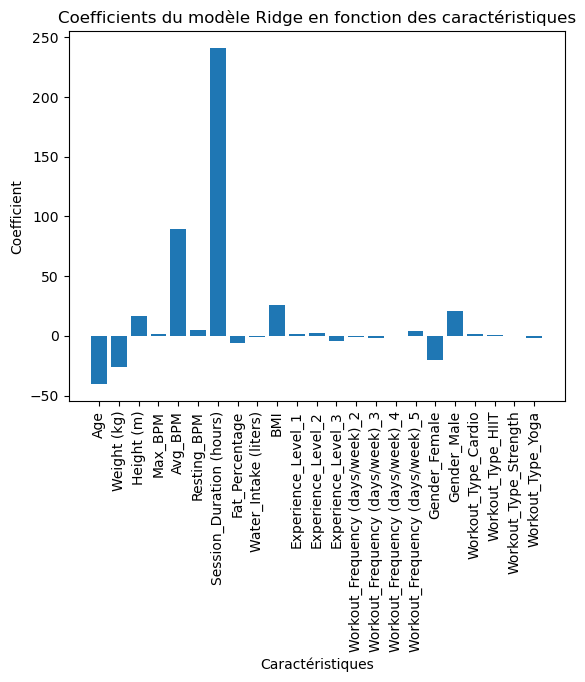

In [85]:
coefficients_Ridge = Ridge_final.coef_

plt.bar(columns, coefficients)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients du modèle Ridge en fonction des variables')
plt.xticks(rotation=90)
plt.show()

On retrouve globalement les mêmes variables explicatives dans le même ordre, ce qui est tout à fait cohérent avec le fait que la régression
linéaire simple semble déjà très bien fonctionner. C'est d'autant plus cohérent avec le fait que le coefficient 'alpha' sélectionné par validation
croisée est très faible (autrement dit, on n'applique quasiment aucune pénalisation).

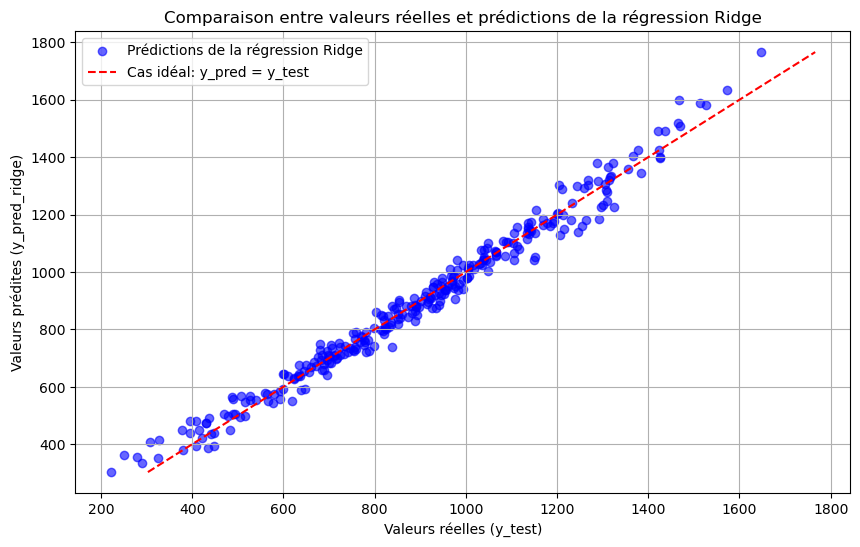

In [79]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_ridge, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions de la régression Ridge')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_ridge)')
plt.title('Comparaison entre valeurs réelles et prédictions de la régression Ridge')
plt.legend()
plt.grid(True)
plt.show()

On observe le même phénomène que pour la régression linéaire simple. Les prédictions collent bien aux valeurs réelles lorsque ces dernières
se situent plutôt au milieu de la droite (valeurs réelles aux alentours de 800 - 1200), mais elles s'écartent une fois celles-ci en dehors de cette plage de valeurs, comme on l'a quantifié auparavant avec le calcul du $R^2$ pour ces données.

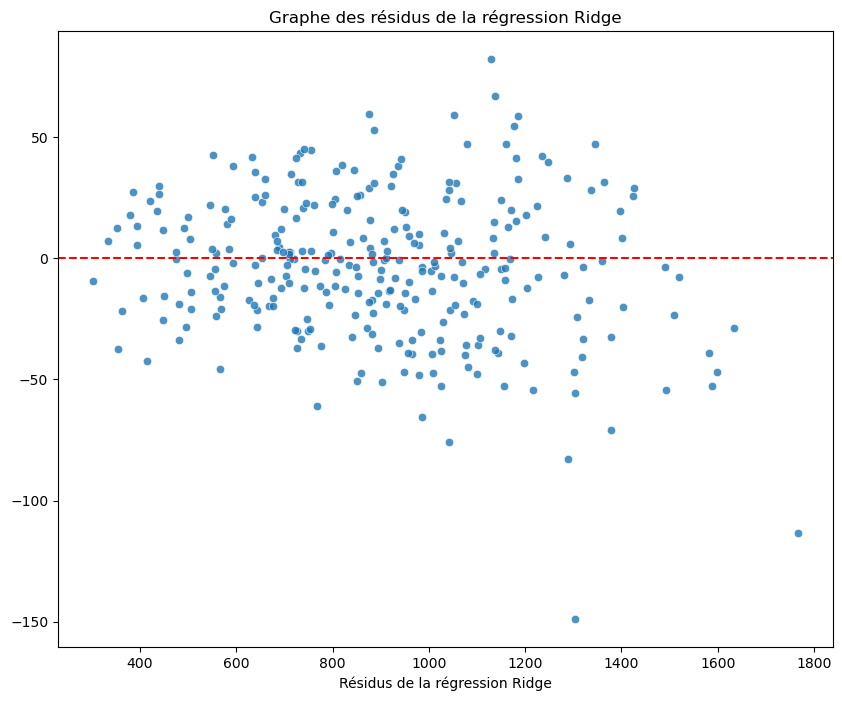

In [81]:
ridge_residues = y_pred_ridge - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = svr_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus de la régression Ridge')
plt.title('Graphe des résidus de la régression Ridge')
plt.show()

Au vu des résultats, la comparaison semble indiquer que l'utilisation d'une régression Ridge n'apporte pas grand-chose du point de vue de 
l'amélioration de la prédiction. On pourrait même se dire que c'est inutilement plus compliqué et conserver seulement la régression linéaire simple.

# 3) Régression Lasso : 

On entraîne ensuite une régression Lasso, en calibrant encore une fois le paramètre 'alpha' par validation croisée. Le paramètre 'alpha' est ici associé à un terme de pénalité du type norme L1 des coefficients. L'avantage est qu'elle permet ainsi de faire de la sélection de variables.

In [88]:
params_lasso = {'alpha': np.linspace(0.001,100,5)}
Lasso_init = Lasso(max_iter = 5000)  # On augmente le nombre d'itérations pour assurer de la convergence
Lasso_cv = GridSearchCV(Lasso_init, params_lasso, cv = kf, scoring = 'r2')
Lasso_cv.fit(X_train_scaled, y_train)
print("Best parameters for the Lasso regression:", Lasso_cv.best_params_)
print("Best score achieved during cross_validation:", Lasso_cv.best_score_)

Best parameters for the Lasso regression: {'alpha': 0.001}
Best score achieved during cross_validation: 0.9771221852316894


In [89]:
alpha = Lasso_cv.best_params_["alpha"]
Lasso_final = Lasso(alpha = alpha)
Lasso_final.fit(X_train_scaled, y_train)

y_pred_lasso = Lasso_final.predict(X_test_scaled)
r2_lasso = r2_score(y_pred_lasso, y_test)
rmse_lasso = np.sqrt(MSE(y_pred_ridge, y_test))
mae_lasso = MAE(y_pred_ridge, y_test)

print(f"Scores de la régression Lasso: R2 : {r2_lasso:.4f} | RMSE : {rmse_lasso:.4f} | MAE : {mae_lasso:.4f}")

Scores de la régression Lasso: R2 : 0.9800 | RMSE : 40.1625 | MAE : 30.7036


On pourrait formuler exactement la même remarque que pour la régression Ridge concernant les scores obtenus. Cela n'améliore pas la prédiction.

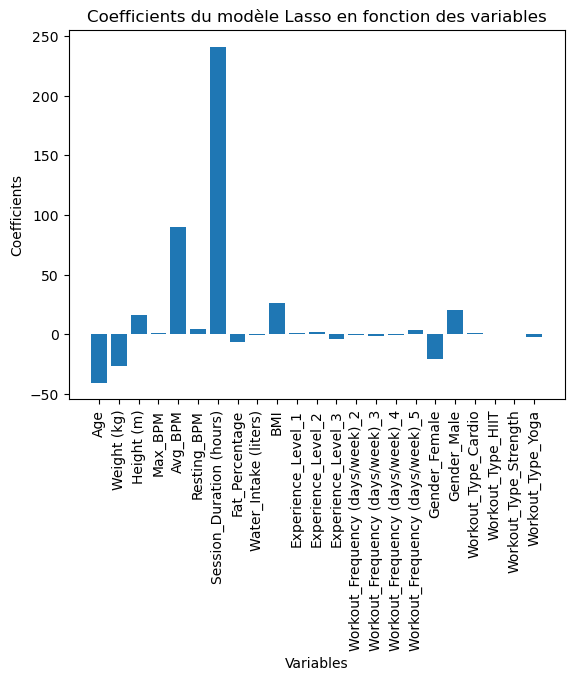

In [90]:
coefficients_lasso = Lasso_final.coef_

plt.bar(columns, coefficients)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficients du modèle Lasso en fonction des variables')
plt.xticks(rotation=90)
plt.show()

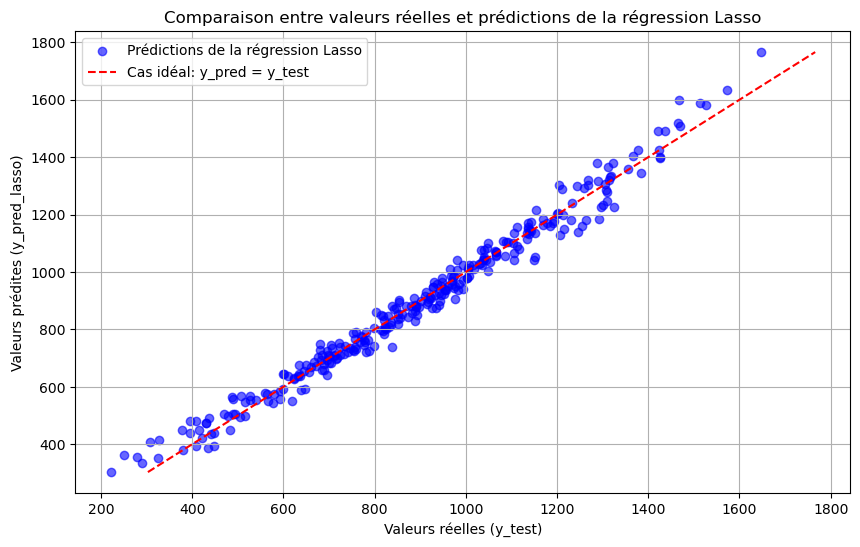

In [91]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_ridge, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions de la régression Lasso')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_lasso)')
plt.title('Comparaison entre valeurs réelles et prédictions de la régression Lasso')
plt.legend()
plt.grid(True)
plt.show()

Idem que pour les deux premières régressions. C'est lorsque les valeurs réelles sont trop basses ou trop hautes que les erreurs principales 
sont commises par le modèle.

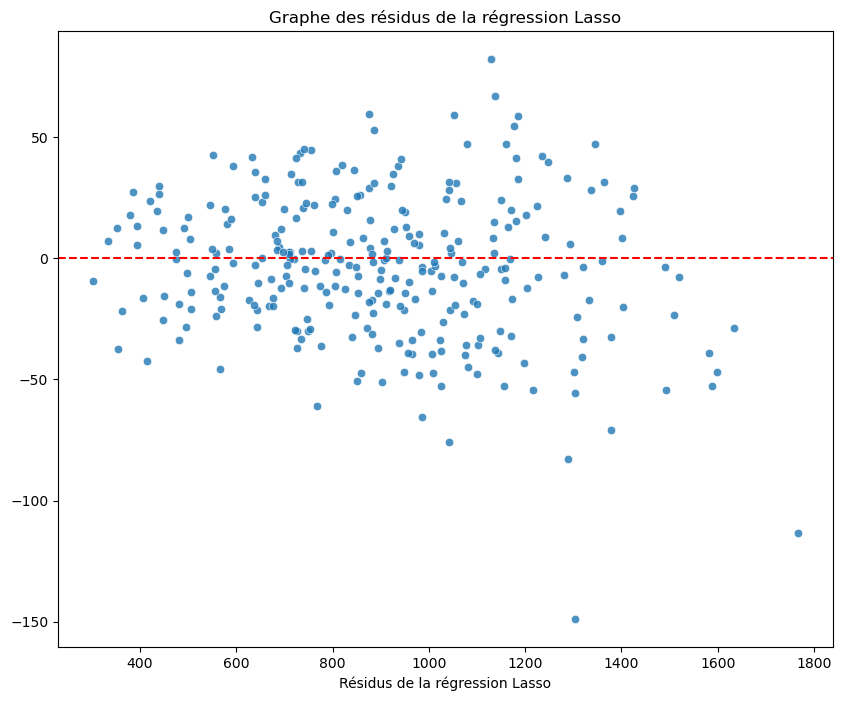

In [92]:
lasso_residues = y_pred_lasso - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = svr_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus de la régression Lasso')
plt.title('Graphe des résidus de la régression Lasso')
plt.show()

In [198]:
mask_1 = y_test > 1200
mask_2 = y_test < 600
y_test_1 = y_test[mask_1]
y_pred_lasso_1 = y_pred_lasso[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_lasso_2 = y_pred_lasso[mask_2]
r2_lasso_1 = r2_score(y_pred_lasso_1, y_test_1)
r2_lasso_2 = r2_score(y_pred_lasso_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_ridge_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_ridge_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.7178
R2 pour les variables à valeurs < 600 : 0.7707


Finalement, après entraînement de ces trois modèles linéaires classiques, on se rend compte que l'application d'une pénalisation (type norme L1
ou norme L2) n'améliore pas de manière visible le modèle de la régression linéaire simple, qui est déjà très performant sur ce jeu de données.
A la limite, on pourrait peut-être considérer que l'utilisation de la régression Lasso permet plus facilement de mettre à 0 les coefficients
sans importance pour la prédiction, et donc conserver seulement les variables explicatives.

# II) Entraînement d'un modèle SVR (Support Vector Regression) :

On passe ensuite à l'entraînement d'un modèle de SVR (Support Vector Regression). Cette fois-ci, on doit plusieurs hyper-paramètres par
validation croisée, dont le noyau ('kernel'), la valeur du paramètre 'gamma' en cas de noyau gaussien, mais aussi le paramètre 'C', qui représente un coefficient de pénalisation (avec une erreur L2 par défaut dans scikit-learn).

In [93]:
from sklearn.svm import SVR

# Le kernel par défaut pour les SVMs est 'RBF' par défaut en Python
parameters = {'gamma':[0.00001,0.0001,0.001,0.01,0.1], 'kernel': ['linear','rbf','poly'], 'C':[1,10,100,200,300,400,500]} # Dictionnaire de paramètres
# Dans un premier temps, on cherche simplement le bon ordre de grandeur pour les différents paramètres
svr = SVR()
svr_tuning = GridSearchCV(svr, parameters)
svr_tuning.fit(X_train_scaled, y_train)
y_pred_svr = svr_tuning.predict(X_test_scaled)
print('Best parameters for the svr:',svr_tuning.best_params_)
print('Best score achieved by the svr:', svr_tuning.score(X_test_scaled, y_test))  # par défaut le score est 'r2'

# On obtient un très bon score (R^2) de 0.98 en utilisant un SVR avec 'RBF' pour kernel, un paramètre 'gamma' de 0.01 et un 
# coefficient de régularisation qui vaut 'C' = 200

Best parameters for the svr: {'C': 500, 'gamma': 0.01, 'kernel': 'rbf'}
Best score achieved by the svr: 0.9886095728060234


In [94]:
# On peut maintenant tenter d'améliorer le modèle en calibrant encore mieux les hyper-paramètres
# tout en conservant un kernel qui vaut 'RBF'
parameters_svr = {'gamma': np.linspace(0.0005,0.1,5), 'C':np.linspace(400,1000,5)} # On teste pour un C plus grand
svr_1 = SVR(kernel = 'rbf')
svr_1_tuned = GridSearchCV(svr_1, parameters_svr)
svr_1_tuned.fit(X_train_scaled, y_train)
y_pred = svr_1_tuned.predict(X_test_scaled)
print("Best parameters for SVR_1: ", svr_1_tuned.best_params_)
print("Best score achieved for SVR_1: ",svr_1_tuned.score(X_test_scaled, y_test))


svr_2 = SVR(kernel = 'rbf', gamma = 0.01, C = 500)  # SVR optimal de la première partie
svr_2.fit(X_train_scaled, y_train)  
y_pred_2 = svr_2.predict(X_test_scaled)
print("Score achieved using the first SVR: ", svr_2.score(X_test_scaled, y_test))

Best parameters for SVR_1:  {'C': 550.0, 'gamma': 0.025375}
Best score achieved for SVR_1:  0.9847865447935392
Score achieved using the first SVR:  0.9886095728060234


(292, 23)
(292,)


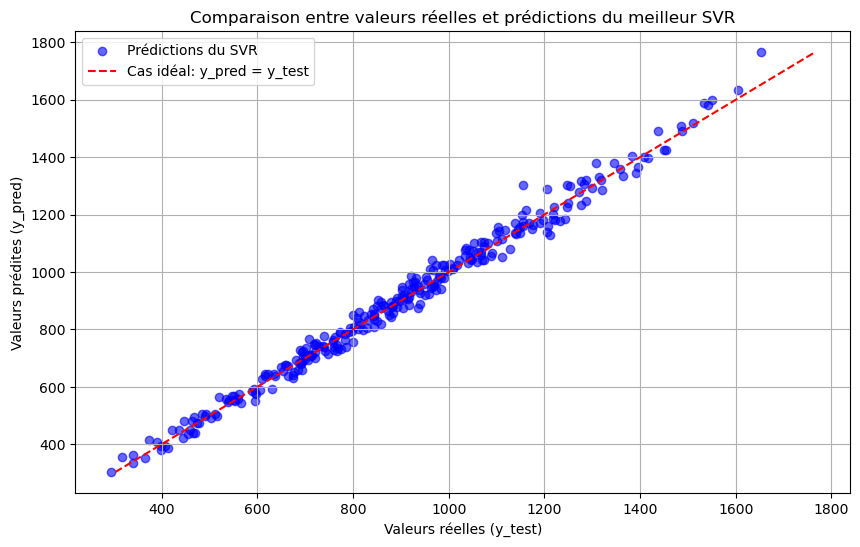

In [95]:
# A l'arrivée on a donc plutôt intérêt à conserver les paramètres suivants:
# kernel = RBF, gamma = 0.01 et C = 500, ce qui représente une assez grande pénalisation
# On cherche maintenant à visualiser le résultat pour le meilleur SVR:
print(X_test.shape)
print(y_test.shape)
plt.figure(figsize = (10,6))
plt.scatter(y_pred_2, y_test, color = 'blue', alpha = 0.6, label = 'Prédictions du SVR')  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Comparaison entre valeurs réelles et prédictions du meilleur SVR')
plt.legend()
plt.grid(True)
plt.show()

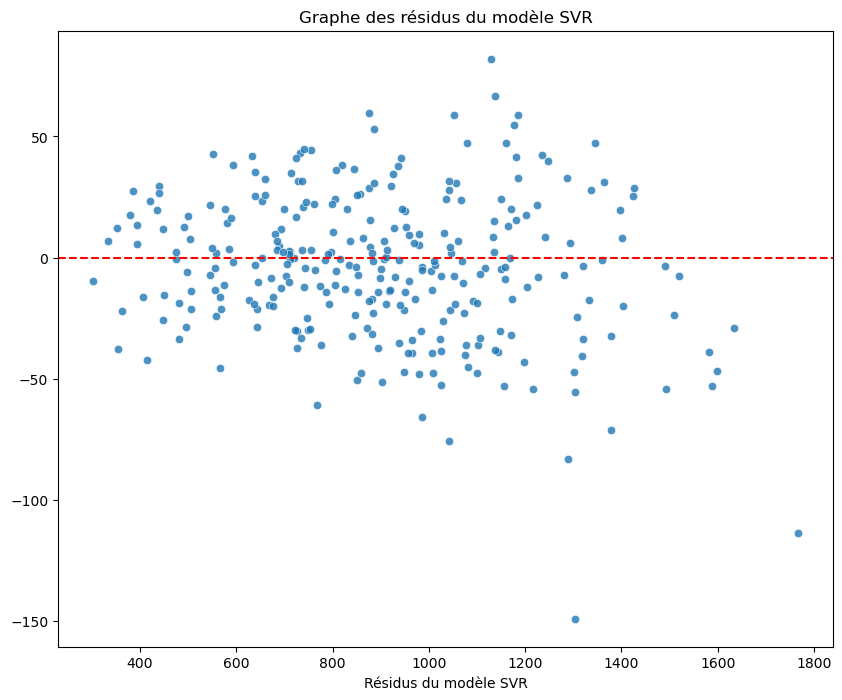

In [96]:
svr_residues = y_pred_svr - y_test
plt.figure(figsize = (10,8))
sns.scatterplot(x = y_test, y = svr_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus du modèle SVR')
plt.title('Graphe des résidus du modèle SVR')
plt.show()

In [97]:
r2_svr = r2_score(y_pred_svr, y_test)
rmse_svr = np.sqrt(MSE(y_pred_svr, y_test))
mae_svr = MAE(y_pred_svr, y_test)

print(f"Scores du meilleur SVR : R2 : {r2_svr:.4f} | RMSE : {rmse_svr:.4f} | MAE : {mae_svr:.4f}")

Scores du meilleur SVR : R2 : 0.9883 | RMSE : 30.1046 | MAE : 23.1951


On voit que le $R^2$ du SVR est globalement meilleur que celui de la régression linéaire, de même pour le RMSE et la MAE. On peut aussi essayer de cibler plus spécifiquement les observations problématiques, identifiées dans le cas des modèles linéaires :

In [160]:
mask_1 = y_test > 1200
mask_2 = y_test < 600
y_test_1 = y_test[mask_1]
y_pred_svr_1 = y_pred_svr[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_svr_2 = y_pred_svr[mask_2]
r2_svr_1 = r2_score(y_pred_svr_1, y_test_1)
r2_svr_2 = r2_score(y_pred_svr_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_svr_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_svr_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.8627
R2 pour les variables à valeurs < 600 : 0.9352


Finalement, on observe que les paramètres retenus pour le SVR (kernel = RBF, gamma = 0.01, C = 500) permettent effectivement d'obtenir une prédiction
qui s'approche assez fidèlement de la réalité, avec un $R^2$ de l'ordre de 0.985. Le SVR semble donc être un très bon modèle pour le cas présent. Il permet notamment d'améliorer l'efficacité vis-à-vis du $R^2$ (par rapport à la régression linéaire), surtout au niveau des observations à valeurs extrêmes, ce qui confirme l'analyse de la courbe des valeurs prédites par rapport aux valeurs réelles.
Cependant, on ne peut pas (par construction du SVR) accéder à l'importance des différentes variables dans la prédiction.

# III) Entraînement d'un arbre de régression et d'une forêt aléatoire :

# 1) Arbre de régression :

On passe maintenant à l'entraînement d'un arbre de régression, en calibrant deux hyperparamètres: le 'max_depth' qui quantifie la profondeur 
maximale de l'arbre et le 'min_samples_leaf' qui quantifie la proportion minimale d'observations qui doit être contenue dans chaque feuille de l'arbre. 

In [98]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [99]:
# On commence par instancier un arbre de régression
# On calibre certains hyper-paramètres, dont 'max_depth' et 'min_samples_leaf'
dt = DecisionTreeRegressor()
parameters_dt = {'max_depth': np.arange(1,11,1), 'min_samples_leaf': np.arange(0.01, 0.9, 0.05)}
dt_tuned = GridSearchCV(dt, parameters_dt, cv = 5)
dt_tuned.fit(X_train_scaled, y_train)
y_pred = dt_tuned.predict(X_test_scaled)
print('Best R2 achieved by the tree:', dt_tuned.best_score_)
print('Best parameters associated:', dt_tuned.best_params_)
best_params = dt_tuned.best_params_

Best R2 achieved by the tree: 0.9203649546261273
Best parameters associated: {'max_depth': 8, 'min_samples_leaf': 0.01}


In [100]:
print(best_params)
print(best_params['max_depth'])

{'max_depth': 8, 'min_samples_leaf': 0.01}
8


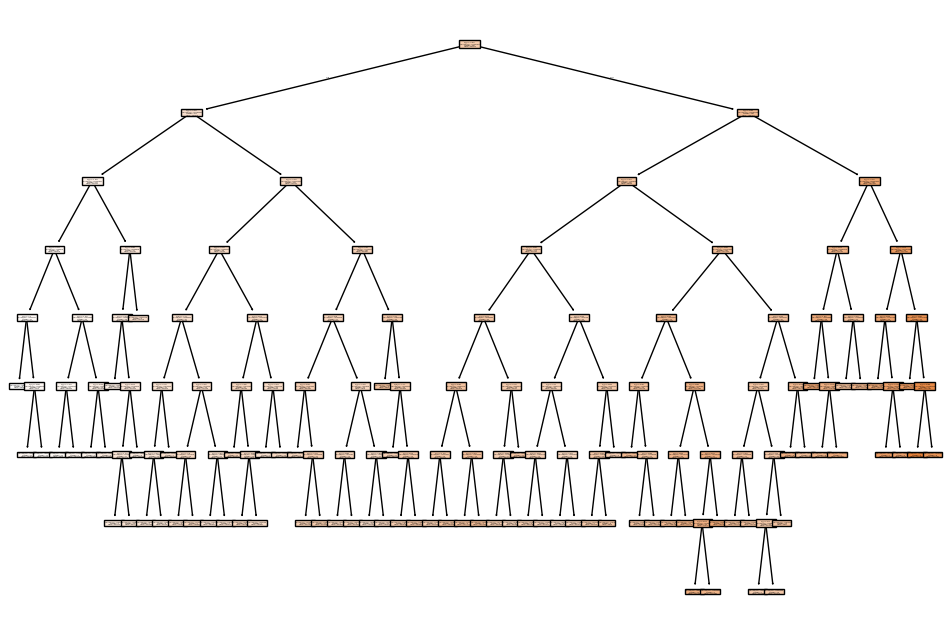

In [101]:
# On peut essayer de visualiser l'arbre résultant à l'aide de la fonction plot_tree
# Pour cela, on doit ré-entraîner un arbre avec exactement les mêmes paramètres que ceux 
# retenus par validation croisée, donnés par dt_tuned.best_params_
dt_viz = DecisionTreeRegressor(max_depth = best_params['max_depth'], min_samples_leaf = best_params['min_samples_leaf'])
dt_viz.fit(X_train_scaled, y_train)
plt.figure(figsize = (12,8))
plot_tree(dt_viz, filled=True)
plt.show()

Malgré le fait que le $R^2$ soit assez bon (plus de 0.92), on constate que l'arbre a beaucoup de feuilles. En effet, en jetant un coup d'oeil aux paramètres retenus par validation croisée pour le meilleur arbre, on voit qu'il a conservé une très grande profondeur (max_depth = 9) ainsi que la plus faible proportion d'échantillon obligatoire dans chaque feuille (min_samples_leaf d'à peine 0.01). Autrement dit, même si le biais est très faible, on s'attend à une grande variance et donc à observer du sur-apprentissage.
On peut essayer d'élaguer l'arbre (étape de pruning).

Dans Python, la technique est un peu particulière et fait appel à un coefficient nommé 'ccp_alpha'. Le pruning consiste alors à générer une liste croissante de coefficients et d'entraîner des arbres pour chacun des coefficients retenus : 

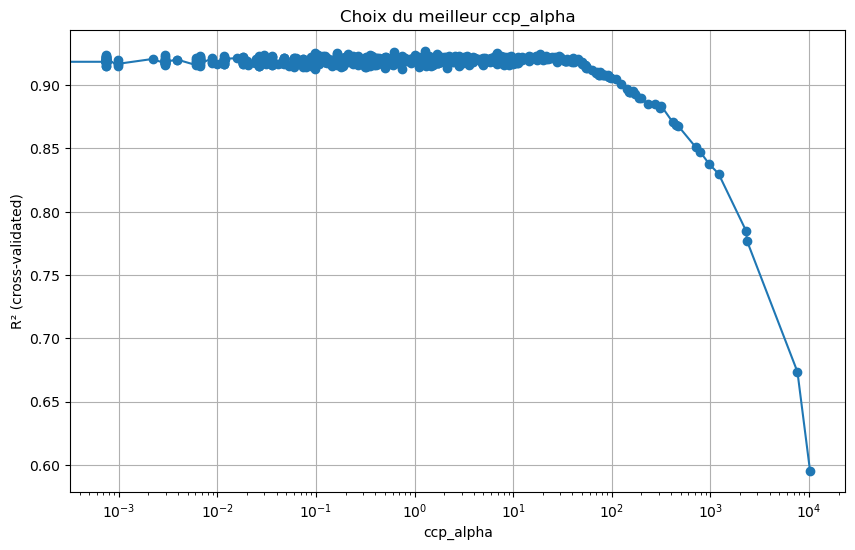

Meilleur alpha sélectionné : 1.2645007342143906


In [102]:
# Dans scikit-learn, le pruning peut se faire à l'aide d'un paramètre appelé ccp_alpha
path = DecisionTreeRegressor().cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas = path.ccp_alphas[:-1] # On enlève le dernier alpha (ne conserve que le premier noeud)
cv_scores = []
kf_1 = KFold(n_splits=5, shuffle=True, random_state=42)  # On réduit la validation croisée à 5 modalités à cause du temps de calcul
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha = alpha)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kf_1, scoring = 'r2')
    cv_scores.append(np.mean(scores))


# On essaie de visualiser le meilleur score en fonction de ccp_alpha:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, cv_scores, marker='o', linestyle='-')
plt.xlabel("ccp_alpha")
plt.ylabel("R² (cross-validated)")
plt.title("Choix du meilleur ccp_alpha")
plt.xscale('log')
plt.grid(True)
plt.show()

best_idx = np.argmax(cv_scores)
best_alpha = ccp_alphas[best_idx]
print("Meilleur alpha sélectionné :", best_alpha) # Sélection du meilleur alpha après validation croisée
    

In [103]:
dt_pruned = DecisionTreeRegressor(ccp_alpha = best_alpha)
dt_pruned.fit(X_train, y_train)
dt_pruned_score = dt_pruned.score(X_test, y_test)
print('Performance achieved by the pruned tree (R2):', dt_pruned_score)
print('Parameters of the pruned tree:', dt_pruned.get_params())

Performance achieved by the pruned tree (R2): 0.939975138571231
Parameters of the pruned tree: {'ccp_alpha': 1.2645007342143906, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


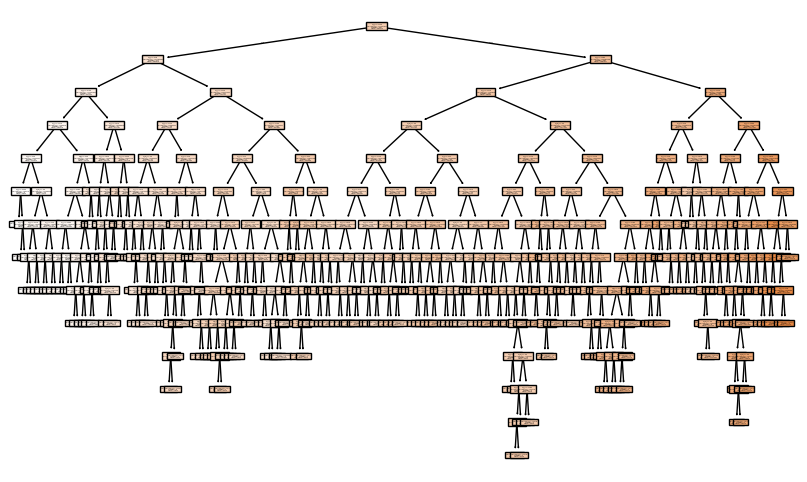

In [104]:
# On visualise enfin l'arbre après élagage:

plt.figure(figsize = (10,6))
plot_tree(dt_pruned, filled = True)
plt.show()

On observe que la valeur du ccp_alpha retenue est (beaucoup) trop faible pour élaguer suffisamment l'arbre. On choisit alors la plus grande valeur du ccp_alpha qui permet de conserver une (assez) bonne valeur de R2. On applique en fait la même technique que la sélection de modèle sur courbe ROC qui consiste à se fixer un taux de vrais positifs et à conserver le modèle qui, à ce taux, donne le taux de faux positifs le plus faible. Visuellement, la valeur recherchée est proche de 50. Plus précisément, on peut le trouver en reprenant le graphe précédent avec le code suivant :

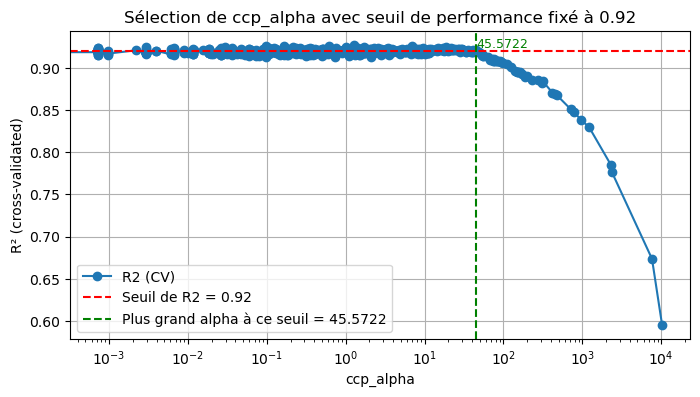

In [125]:
r2_threshold = 0.92  # On fixe une valeur de r2 minimale que l'on souhaite conserver

valid_indices = [i for i,score in enumerate(cv_scores) if score >= r2_threshold]
if valid_indices:
    idx = valid_indices[-1] # On sélectionne le plus grand alpha qui respecte la contrainte sur le r2 pour élaguer l'arbre autant que possible
    alpha_threshold = ccp_alphas[idx]
else:
    alpha_threshold = None

plt.figure(figsize = (8,4))
plt.plot(ccp_alphas, cv_scores, marker='o', label = 'R2 (CV)')
plt.axhline(y=r2_threshold, color = 'r', linestyle = '--', label = f'Seuil de R2 = {r2_threshold}')

if alpha_threshold is not None:
    plt.axvline(x = alpha_threshold, color = 'g', linestyle='--', label= f'Plus grand alpha à ce seuil = {alpha_threshold:.4f}')
    plt.text(alpha_threshold, r2_threshold, f'{alpha_threshold:.4f}', color = 'green', fontsize = 9, verticalalignment = 'bottom')

plt.xscale('log')
plt.xlabel("ccp_alpha")
plt.ylabel("R² (cross-validated)")
plt.title("Sélection de ccp_alpha avec seuil de performance fixé à 0.92")
plt.grid(True)
plt.legend()
plt.show()

    

In [106]:
dt_final = DecisionTreeRegressor(ccp_alpha = alpha_threshold)
dt_final.fit(X_train_scaled, y_train)
dt_final_score = dt_final.score(X_test_scaled, y_test)
print('Performance achieved by the pruned tree (R2):', dt_final_score)
print('Parameters of the pruned tree:', dt_final.get_params())

Performance achieved by the pruned tree (R2): 0.9328456149950329
Parameters of the pruned tree: {'ccp_alpha': 45.5722385381014, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


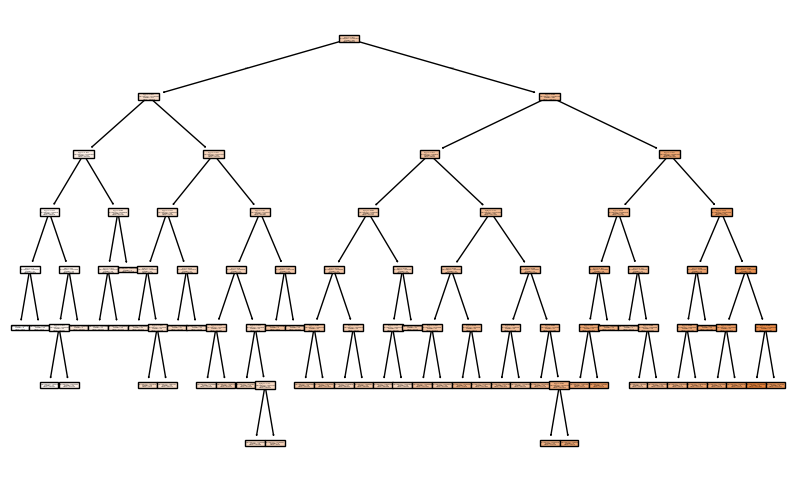

In [107]:
# On visualise l'arbre sélectionné en pratique, après pruning efficace:

plt.figure(figsize = (10,6))
plot_tree(dt_final, filled = True)
plt.show()

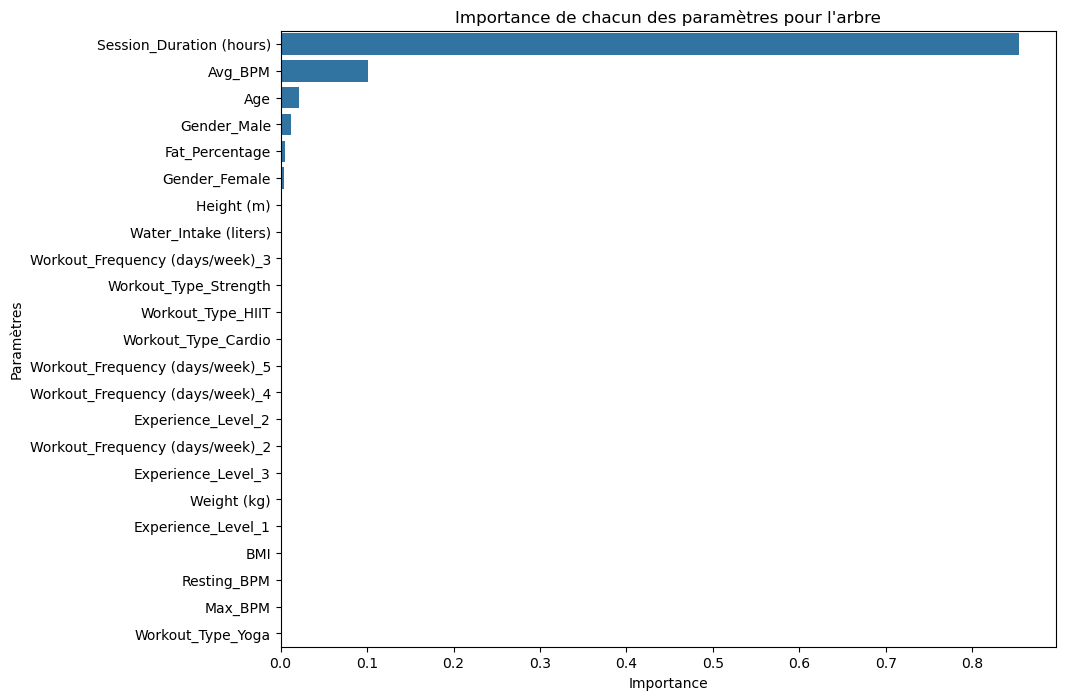

In [168]:
importances = dt_final.feature_importances_
feature_names = data.drop("Calories_Burned", axis=1).columns
features = pd.Series(importances, index = feature_names).sort_values(ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(x = features.values, y = features.index)
plt.title("Importance de chacun des paramètres pour l'arbre")
plt.xlabel("Importance")
plt.ylabel("Paramètres")
plt.show()

Encore une fois, pour l'arbre élagué, les deux variables explicatives les plus importantes sont 'Session_Duration (hours)', bien devant 'Avg_BPM' 
et lui-même devant 'Age'. Il n'y a donc pas de surprises de ce côté-là.

In [108]:
y_pred_tree = dt_final.predict(X_test_scaled)
r2_tree = r2_score(y_pred_tree, y_test)
rmse_tree = np.sqrt(MSE(y_pred_tree, y_test))
mae_tree = MAE(y_pred_tree, y_test)

print(f"Scores du meilleur arbre : R2 : {r2_tree:.4f} | RMSE : {rmse_tree:.4f} | MAE : {mae_tree:.4f}")

Scores du meilleur arbre : R2 : 0.9275 | RMSE : 73.0972 | MAE : 57.4200


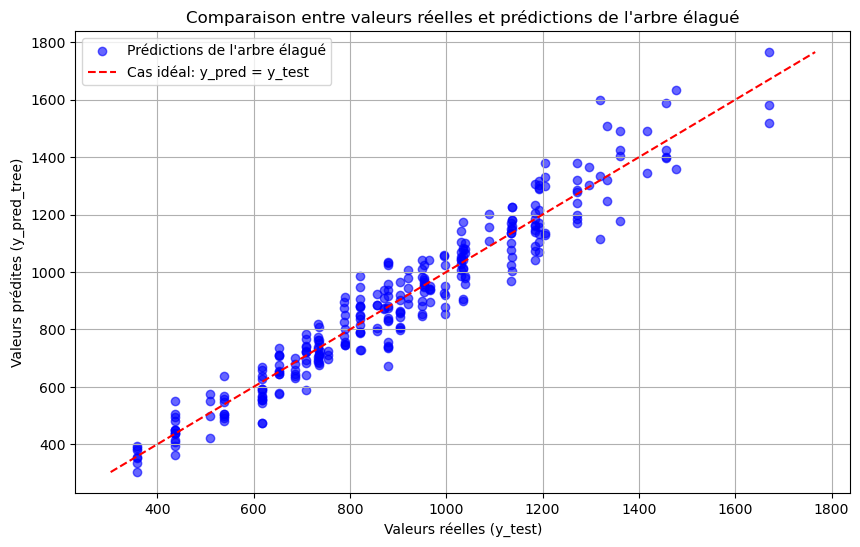

In [172]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_tree, y_test, color = 'blue', alpha = 0.6, label = "Prédictions de l\'arbre élagué")  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_tree)')
plt.title('Comparaison entre valeurs réelles et prédictions de l\'arbre élagué')
plt.legend()
plt.grid(True)
plt.show()

On observe cependant que les valeurs prédites sont beaucoup moins précises que dans le cas des autres modèles. 

On peut aussi tester plus spécifiquement sur les valeurs extrêmes: 

In [167]:
mask_1 = y_test > 1200
mask_2 = y_test < 600
y_test_1 = y_test[mask_1]
y_pred_tree_1 = y_pred_tree[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_tree_2 = y_pred_tree[mask_2]
r2_tree_1 = r2_score(y_pred_tree_1, y_test_1)
r2_tree_2 = r2_score(y_pred_tree_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_tree_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_tree_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.4869
R2 pour les variables à valeurs < 600 : 0.6611


En conclusion, on obtient bien un arbre (un peu) élagué, qui à l'air performant, c'est-à-dire qui présente un $R^2$ qui vaut au moins 0.92 (seuil fixé), mais qui ne l'est pas vraiment. On s'attend par nature à une mauvaise généralisation à cause de la tendance des arbres au sur-apprentissage et surtout on observe qu'il est moins performant qu'un modèle linéaire plus classique comme le SVR précédent, comme le montre la courbe des valeurs prédites par l'arbre. En particulier, il est très faible sur les valeurs extrêmes. Ce n'est donc pas un modèle adapté dans ce contexte.
On passe donc à l'entraînement d'une forêt aléatoire pour tenter de réduire la variance.

# 2) Forêt aléatoire : 

In [109]:
from sklearn.ensemble import RandomForestRegressor

L'entraînement d'une forêt aléatoire est très long. On pourrait opter pour une recherche aléatoire (RandomizedSearchCV au lieu de GridSearchCV).

In [110]:
forest_params = {'n_estimators':np.arange(100,1000,100), 'max_depth': np.arange(5,8,1)}
forest_init = RandomForestRegressor(random_state = 42)
grid_forest = GridSearchCV(forest_init, forest_params, cv = kf_1, verbose = 1, n_jobs = -1) #On essaie d'accélérer l'entraînement
grid_forest.fit(X_train_scaled, y_train)

print("Best parameters for the random forest:", grid_forest.best_params_)
print("Best score achieved by the random forest (R2):", grid_forest.best_estimator_.score(X_test_scaled, y_test))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for the random forest: {'max_depth': 7, 'n_estimators': 900}
Best score achieved by the random forest (R2): 0.9699131400589884


On peut essayer de visualiser l'importance (décroissante) de chaque paramètre pour la construction de la forêt aléatoire:

In [111]:
print(type(X_test_scaled))
print(type(X_train))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


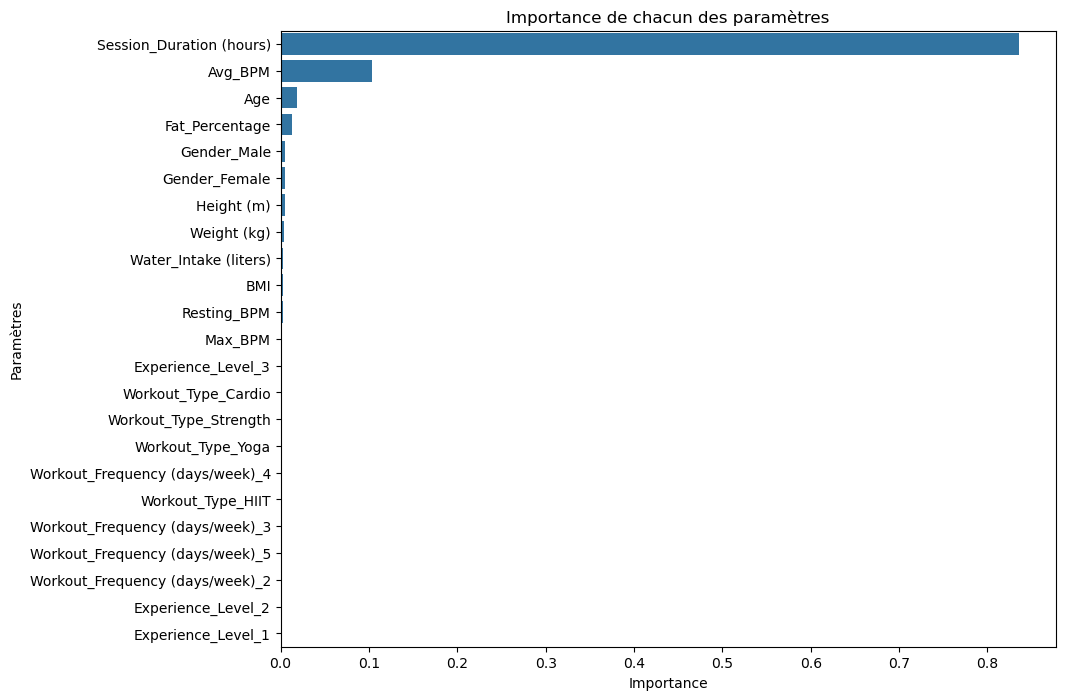

In [176]:
rd_forest = RandomForestRegressor(n_estimators = 900, max_depth = 7)
rd_forest.fit(X_train_scaled, y_train)
importances = rd_forest.feature_importances_
feature_names = data.drop("Calories_Burned", axis=1).columns
features = pd.Series(importances, index = feature_names).sort_values(ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(x = features.values, y = features.index)
plt.title("Importance de chacun des paramètres")
plt.xlabel("Importance")
plt.ylabel("Paramètres")
plt.show()

Encore une fois, la forêt aléatoire confirme la tendance globale concernant l'importance des paramètres pour l'explication de la variable
'Calories_Burned', avec néanmoins ici une importance non négligeable de la variable 'Fat_Percentage'.

In [113]:
# Métriques de la forêt aléatoire:
y_pred_rd_forest = rd_forest.predict(X_test_scaled)
r2_rd_forest = r2_score(y_pred_rd_forest, y_test)
rmse_rd_forest = np.sqrt(MSE(y_pred_rd_forest, y_test))
MAE_rd_forest = MAE(y_pred_rd_forest, y_test)

print(f"Scores de la forêt aléatoire: R2 : {r2_rd_forest:.4f} | RMSE : {rmse_rd_forest:.4f} | MAE : {MAE_rd_forest:.4f}")

Scores de la forêt aléatoire: R2 : 0.9649 | RMSE : 48.8645 | MAE : 37.5831


Le $R^2$ semble bon, mais le RMSE et le MAE sont, en comparaison, plus élevés que pour les modèles linéaires.

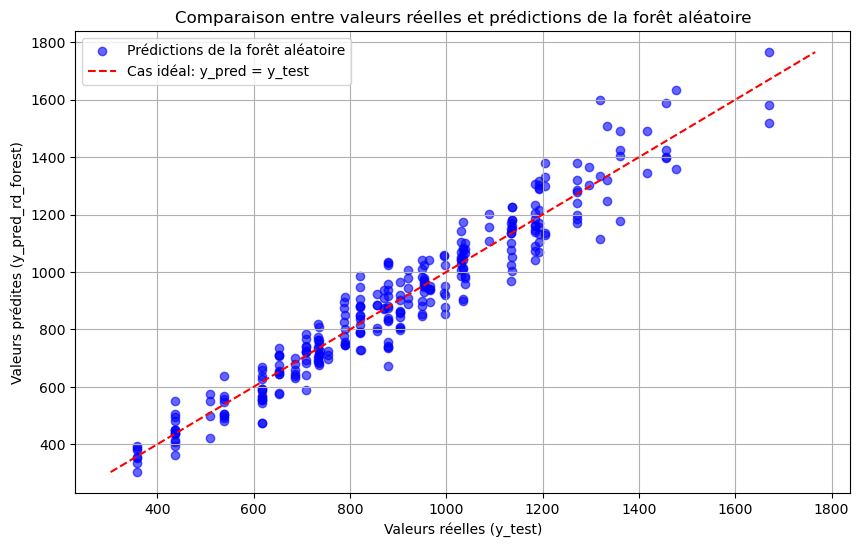

In [175]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_tree, y_test, color = 'blue', alpha = 0.6, label = "Prédictions de la forêt aléatoire")  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_rd_forest)')
plt.title('Comparaison entre valeurs réelles et prédictions de la forêt aléatoire')
plt.legend()
plt.grid(True)
plt.show()

Malgré un très bon $R^2$, la courbe des valeurs prédites en fonction des valeurs réelles n'est pas terrible. Globalement, les valeurs prédites par la forêt aléatoire ou l'arbre de régression collent moins bien à la droite que les modèles linéaires précédents.
On peut également, comme pour les autres modèles, tester sa performance sur les valeurs extrêmes (même si on ne s'attend pas à des miracles au vu de la courbe précédente) : 

In [185]:
mask_1 = y_test > 1200
mask_2 = y_test < 600
y_test_1 = y_test[mask_1]
y_pred_rd_forest_1 = y_pred_rd_forest[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_rd_forest_2 = y_pred_rd_forest[mask_2]
r2_rd_forest_1 = r2_score(y_pred_rd_forest_1, y_test_1)
r2_rd_forest_2 = r2_score(y_pred_rd_forest_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_rd_forest_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_rd_forest_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.5146
R2 pour les variables à valeurs < 600 : 0.7531


Ces résultats confirment les difficultés de la forêt aléatoire (mais aussi des arbres) concernant la prédiction des valeurs extrêmes de la 
variable en question. Finalement, les résultats globaux de ces deux modèles sont moindres comparé à leurs homologues linéaires, certainement plus
adaptés à la situation.

# IV) Entraînement d'un modèle de boosting :

On entraîne un modèle XGBoost. Il faut là encore calibrer un grand nombre d'hyperparamètres.
Dans ce cas précis, on calibre les paramètres suivants:
- n_estimators : nombre d'estimateurs (arbres) agrégés par le modèle xgboost
- max_depth : la longueur maximale des arbres
- learning_rate : taux d'apprentissage pour la mise à jour de l'estimateur
On commence donc à rentrer dans le dur vis-à-vis du temps de calcul, surtout à cause de la validation croisée qui multiplie le nombre de calculs.
On utilise ici plutôt une recherche aléatoire (avec RandomizedSearchCV) qu'une recherche exhaustive (avec GridSearchCV).

In [114]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV 

In [115]:
params_xgb = {'n_estimators': np.arange(300,1000,100), 'max_depth': np.arange(3,8,1), 'learning_rate': np.arange(0.01,0.1,0.02)}
xgb_init = XGBRegressor(objective = 'reg:squarederror', n_jobs = -1)
random_search = RandomizedSearchCV(xgb_init, params_xgb, scoring = 'r2', n_iter = 50, cv = kf_1, verbose = 1, random_state = 42)
random_search.fit(X_train_scaled, y_train)
xgb_best = random_search.best_estimator_
print("Best parameters for xgboost:", random_search.best_params_)
print("Best score for xgboost:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for xgboost: {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.049999999999999996}
Best score for xgboost: 0.994712828874276


Etonnamment, on obtient un $R^2$ excellent (plus de 0.99) avec une recherche aléatoire. On peut encore visualiser l'importance des paramètres :

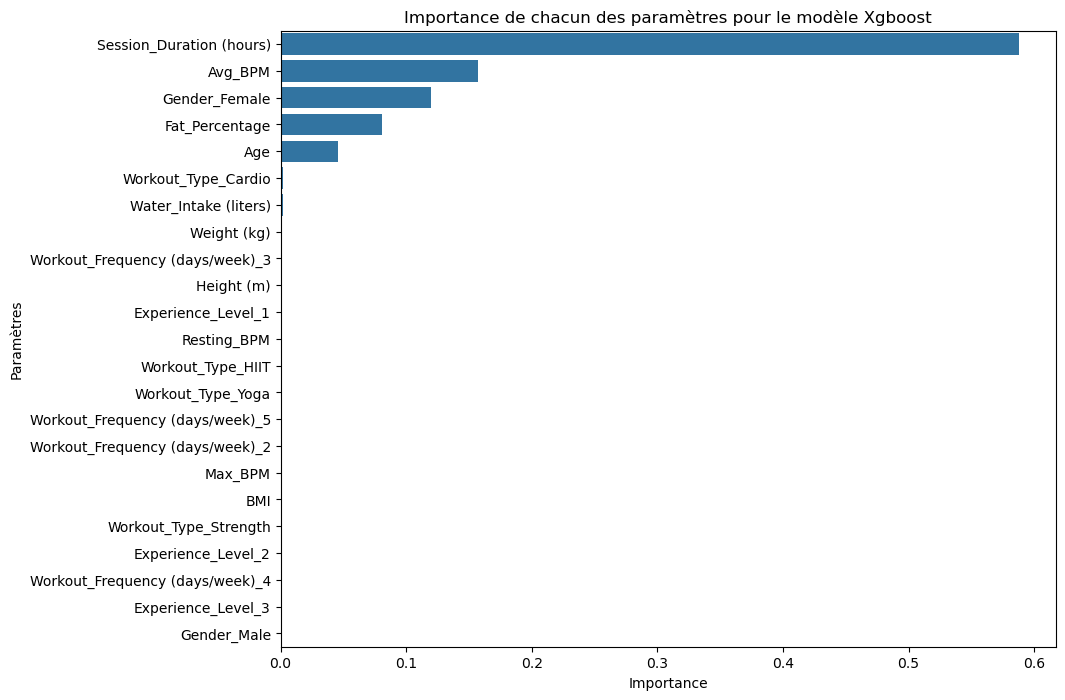

In [116]:
importances = xgb_best.feature_importances_
feature_names = data.drop("Calories_Burned", axis=1).columns
features = pd.Series(importances, index = feature_names).sort_values(ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(x = features.values, y = features.index)
plt.title("Importance de chacun des paramètres pour le modèle Xgboost")
plt.xlabel("Importance")
plt.ylabel("Paramètres")
plt.show()


Ici encore, la prédiction de la variable Calories_Burned s'appuie principalement sur les variables Session_Duration (hours) et Avg_BPM. Cependant, on observe cette fois que le sexe de l'individu (à travers la variable 'Gender_Female') a une importance non négligeable pour la prédiction du modèle.

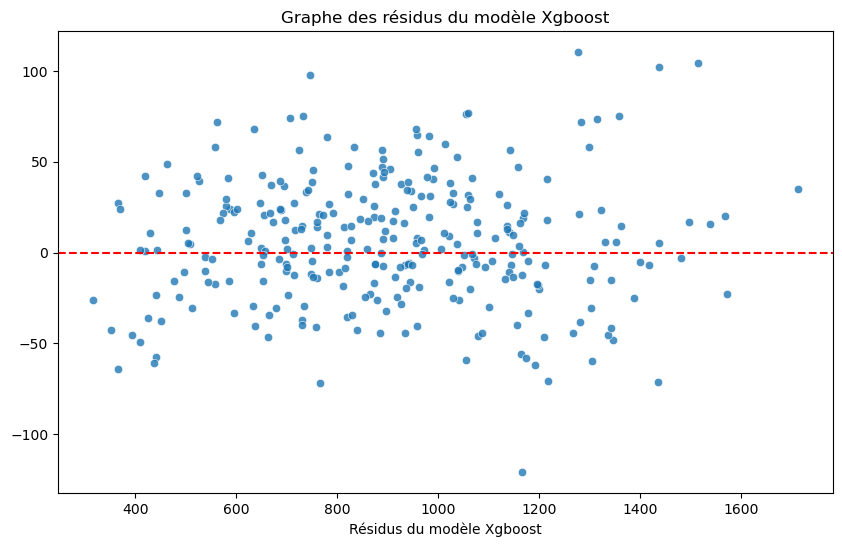

In [182]:
# Graphe des résidus de xgboost:
param_xgb = random_search.best_params_
xgb_best_final = XGBRegressor(objective = 'reg:squarederror', n_estimators = param_xgb['n_estimators'], max_depth = param_xgb['max_depth'], learning_rate = param_xgb['learning_rate'])
xgb_best_final.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_best_final.predict(X_test_scaled)
xgb_residues = y_test - y_pred

plt.figure(figsize = (10,6))
sns.scatterplot(x = y_pred_xgb, y = xgb_residues, alpha = 0.8)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel('Résidus du modèle Xgboost')
plt.title('Graphe des résidus du modèle Xgboost')
plt.show()


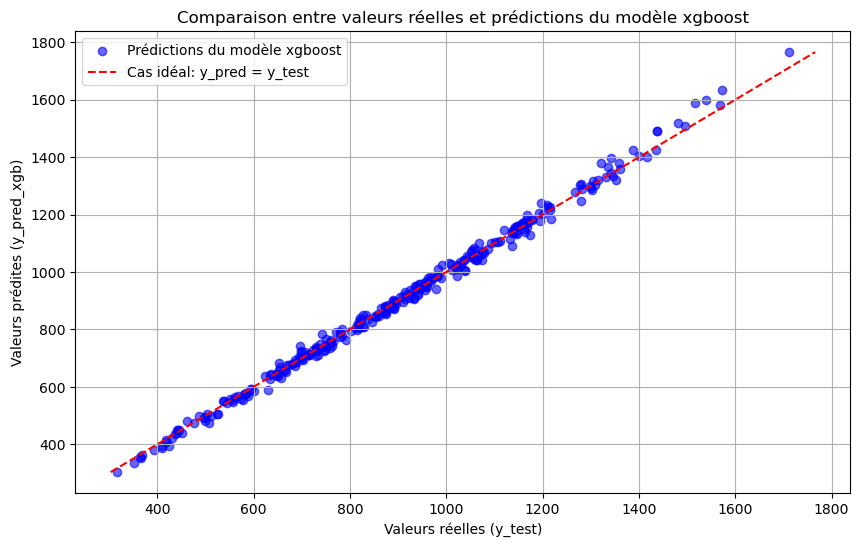

In [184]:
plt.figure(figsize = (10,6))
plt.scatter(y_pred_xgb, y_test, color = 'blue', alpha = 0.6, label = "Prédictions du modèle xgboost")  # le alpha règle l'opacité
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label = 'Cas idéal: y_pred = y_test')  
plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred_xgb)')
plt.title('Comparaison entre valeurs réelles et prédictions du modèle xgboost')
plt.legend()
plt.grid(True)
plt.show()

On observe cette fois-ci un très bon ajustement entre les valeurs prédites par le modèle xgboost et les valeurs réelles, en ayant en plus semble-t-il l'avantage de gommer les mauvaises prédictions pour les valeurs extrêmes, ce qui peut aussi se voir sur le graphe des résidus.

In [183]:
r2_xgb = r2_score(y_pred_xgb, y_test)
rmse_xgb = np.sqrt(MSE(y_pred_xgb, y_test))
mae_xgb = MAE(y_pred_xgb, y_test)

print(f"R2 : {r2_xgb:.4f} | RMSE : {rmse_xgb:.4f} | MAE : {mae_xgb:.4f}")

R2 : 0.9956 | RMSE : 18.3094 | MAE : 13.6253


Enfin, concernant l'impression de bonne tenue du modèle sur les valeurs extrêmes : 

In [186]:
mask_1 = y_test > 1200
mask_2 = y_test < 600
y_test_1 = y_test[mask_1]
y_pred_xgb_1 = y_pred_xgb[mask_1] # On récupère les prédictions correspondantes 
y_test_2 = y_test[mask_2]
y_pred_xgb_2 = y_pred_xgb[mask_2]
r2_xgb_1 = r2_score(y_pred_xgb_1, y_test_1)
r2_xgb_2 = r2_score(y_pred_xgb_2, y_test_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_xgb_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_xgb_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.9279
R2 pour les variables à valeurs < 600 : 0.9665


Finalement, le modèle xgboost performe extrêmement bien dans cette situation. Il possède un très bon $R^2$, et surtout il corrige les problèmes
de prédiction des valeurs extrêmes identifiés sur les modèles linéaires et non résolus par l'entraînement des arbres ou de la forêt aléatoire.
Il apparaît donc comme le meilleur modèle jusqu'à présent en termes de performance.

# V) Entraînement d'un réseau de neurones (MLP) : 

On entraîne un réseau de neurones à l'aide de la libraire PyTorch de python.

In [134]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split

In [135]:
print("CUDA dispo:", torch.cuda.is_available())

CUDA dispo: False


In [136]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
full_dataset = TensorDataset(X_train_tensor, y_train_tensor)

train_size = int(0.8*len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)  # On divise le jeu principal en jeu d'entraînement et de validation
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle=False)

print(X_train_tensor.shape)  # Vérification des tailles pour coder correctement la couche d'entrée du réseau
print(y_train_tensor.shape)

torch.Size([681, 23])
torch.Size([681, 1])


In [138]:
model = nn.Sequential(  # On entraîne un réseau de neurones dense (ici avec 3 couches)
    nn.Linear(23, 16),  
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,1)
)

criterion = nn.MSELoss()   # On cherche à minimiser la MSE (fonction coût)
optimizer = optim.Adam(model.parameters(), lr=0.01)  # On choisit un optimiseur Adam (robuste)

Epoch 10/100 | Train_loss: 8609.0502 | Val_loss : 7632.7577
Epoch 20/100 | Train_loss: 2344.6124 | Val_loss : 2285.7535
Epoch 30/100 | Train_loss: 1453.7734 | Val_loss : 1496.5459
Epoch 40/100 | Train_loss: 1157.3167 | Val_loss : 1249.6905
Epoch 50/100 | Train_loss: 993.7492 | Val_loss : 1121.9281
Epoch 60/100 | Train_loss: 899.1845 | Val_loss : 1072.6626
Epoch 70/100 | Train_loss: 808.3995 | Val_loss : 978.0813
Epoch 80/100 | Train_loss: 780.0063 | Val_loss : 920.6056
Epoch 90/100 | Train_loss: 711.4428 | Val_loss : 867.1254
Epoch 100/100 | Train_loss: 679.2559 | Val_loss : 888.5852


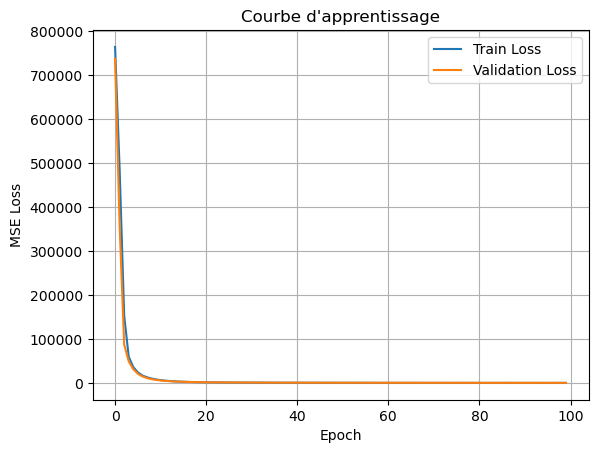

In [144]:
epochs = 100
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for batch_X, batch_Y in train_loader:  # Erreur d'apprentissage
        preds = model(batch_X)
        loss = criterion(preds, batch_Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*batch_X.size(0)
    train_loss /= train_size
    train_losses.append(train_loss)

    model.eval()  
    val_loss = 0
    for batch_X, batch_Y in val_loader:  # Erreur de validation
        preds = model(batch_X)
        loss = criterion(preds, batch_Y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        val_loss += loss.item()*batch_X.size(0)
    val_loss /= val_size
    val_losses.append(val_loss)
    
    if (epoch + 1)%10 == 0:
        print(f"Epoch {epoch+1}/{epochs} | Train_loss: {train_loss:.4f} | Val_loss : {val_loss:.4f}")


plt.plot(train_losses, label='Train Loss')   # Affichage des deux erreurs pour vérifier le bon déroulé de l'entraînement
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid(True)
plt.show()

Un bon indicateur du déroulé correct de l'entraînement du réseau est que les courbes d'erreur d'apprentissage et de validation 
tendent toutes les deux rapidement vers 0 (quand on essaie d'optimiser le MSE comme critère d'erreur).

In [187]:
X_test_tensor = torch.tensor(X_test_scaled, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

model.eval()
with torch.no_grad(): 
    y_pred_tensor = model(X_test_tensor)
y_pred_nn = y_pred_tensor.numpy().flatten()
y_true_nn = y_test_tensor.numpy().flatten()

r2_nn = r2_score(y_pred_nn, y_true_nn)   # Evaluation des performances du réseau sur le jeu de données test
mse_nn = np.sqrt(MSE(y_pred_nn, y_true_nn))
mae_nn = MAE(y_pred_nn, y_true_nn)

print(f"Scores du réseau de neurones : R2 : {r2_nn:.4f} | RMSE : {mse_nn:.4f} | MAE : {mae_nn:.4f}")




Scores du réseau de neurones : R2 : 0.9846 | RMSE : 35.1224 | MAE : 27.5170


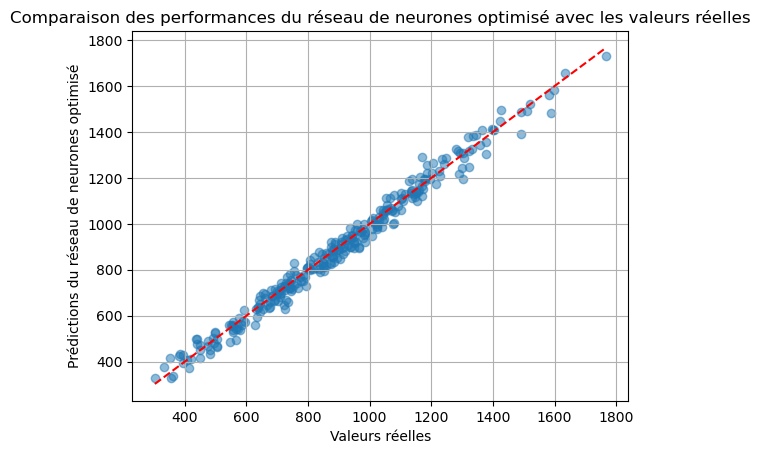

In [147]:
plt.scatter(y_true, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions du réseau de neurones optimisé")
plt.title("Comparaison des performances du réseau de neurones optimisé avec les valeurs réelles")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.grid(True)
plt.show()

Malgré le caractère arbitraire du choix des hyper-paramètres du réseau de neurones (nombre de couches cachées et nombre de neurones par couche),
on arrive à obtenir des résultats satisfaisants. En plus de très bons scores, il semble que le réseau de neurones ait moins de difficulté à prédire les valeurs extrêmes de 'Calories_Burned' que les modèles plus simples comme la régression linéaire. Il reste encore à comparer avec xgboost sur ce point.

In [190]:
mask_1 = y_true_nn > 1200
mask_2 = y_true_nn < 600
y_true_nn_1 = y_true_nn[mask_1]
y_pred_nn_1 = y_pred_nn[mask_1] # On récupère les prédictions correspondantes 
y_true_nn_2 = y_true_nn[mask_2]
y_pred_nn_2 = y_pred_nn[mask_2]
r2_nn_1 = r2_score(y_pred_nn_1, y_true_nn_1)
r2_nn_2 = r2_score(y_pred_nn_2, y_true_nn_2)

print(f"R2 pour les variables à valeurs > 1200 : {r2_nn_1:.4f}")
print(f"R2 pour les variables à valeurs < 600 : {r2_nn_2:.4f}")

R2 pour les variables à valeurs > 1200 : 0.8666
R2 pour les variables à valeurs < 600 : 0.7932


Finalement, le réseau de neurones est un peu moins performant, autant globalement que sur les valeurs extrêmes, que le modèle xgboost, mais il
semble néanmoins meilleur que les autres modèles, notamment linéaires.

# VI) Comparaison et sélection du meilleur modèle : 

On cherche maintenant à comparer les modèles. On va utiliser 3 métriques différentes: le $R^2$, le RMSE (root mean squared error) et le MAE 
(mean absolute error). Evidemment, le meilleur modèle est celui dont le $R^2$ est le plus proche de 1, et dont les deux erreurs (MAE et RMSE) sont 
le plus proche de 0 possible.
Aussi, une tendance s'est déjà dégagée des analyses précédentes:
- les modèles linéaires ont une bonne performance globale, mais présentent des difficultés pour prédire les valeurs extrêmes de la variable 'Calories_Burned'.
- le modèle SVR possède les mêmes caractéristiques que le modèle linéaire, mais avec un surcroît de performance sur tous les points (globales et sur les valeurs extrêmes).
- les modèles à base d'arbres (arbre de régression et forêt aléatoire) semblent les moins bons. Ils sont particulièrement mauvais concernant la prédiction des valeurs extrêmes.
- le modèle xgboost semble être le meilleur, avec un $R^2$ quasiment un 1 et de très bonnes performances sur les valeurs extrêmes.
- il est enfin talonné de près par le réseau de neurones.

In [197]:
model_preds = {
    "Régression Linéaire": y_pred_lin,
    "Lasso": y_pred_lasso,
    "Ridge": y_pred_ridge,
    "SVR": y_pred_svr,
    "Arbre": y_pred_tree,
    "Forêt Aléatoire": y_pred_rd_forest,
    "XGBoost": y_pred_xgb
}

results = []

for name, y_pred in model_preds.items():
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(MSE(y_test, y_pred))
    mae = MAE(y_test, y_pred)
    results.append({
        "Modèle": name,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae
    })

results.append({"Modèle": "Réseau de neurones dense", "R²": r2_nn, "RMSE":mse_nn, "MAE": mae_nn})

# Conversion en DataFrame
results_df = pd.DataFrame(results)

# Tri par R² décroissant
results_df = results_df.sort_values(by="R²", ascending=False).reset_index(drop=True)

# Affichage
print(results_df.round(3))

                     Modèle     R²    RMSE     MAE
0                   XGBoost  0.996  18.309  13.625
1                       SVR  0.989  30.105  23.195
2  Réseau de neurones dense  0.985  35.122  27.517
3                     Lasso  0.980  40.162  30.703
4                     Ridge  0.980  40.162  30.704
5       Régression Linéaire  0.980  40.162  30.704
6           Forêt Aléatoire  0.970  48.865  37.583
7                     Arbre  0.933  73.097  57.420


In [211]:
conditions = {
    "y_test > 1200": y_test > 1200,
    "y_test < 600": y_test < 600
}

results_xtrm = []

for cond_name, cond_mask in conditions.items():
    for model_name, y_pred in model_preds.items():
        r2 = r2_score(y_test[cond_mask], y_pred[cond_mask])
        results_xtrm.append({
            "Sous-catégorie": cond_name,
            "Modèle": model_name,
            "R²": r2
        })

results_xtrm.append({
    "Sous-catégorie": "y_test < 600",
    "Modèle": "Réseau de Neurones",
    "R²": r2_score(y_true_nn_1, y_pred_nn_1)
})

results_xtrm.append({
    "Sous-catégorie": "y_test > 1200",
    "Modèle": "Réseau de Neurones",
    "R²": r2_score(y_true_nn_2, y_pred_nn_2)
})

results_xtrm_df = pd.DataFrame(results_xtrm)

results_pivot = results_xtrm_df.pivot_table(index="Modèle", columns="Sous-catégorie", values="R²")
for col in results_pivot.columns:
  print(results_pivot[[col]].sort_values(by=col, ascending=False).round(3))

Sous-catégorie       y_test < 600
Modèle                           
XGBoost                     0.967
SVR                         0.929
Réseau de Neurones          0.873
Forêt Aléatoire             0.724
Lasso                       0.621
Ridge                       0.621
Régression Linéaire         0.621
Arbre                       0.487
Sous-catégorie       y_test > 1200
Modèle                            
XGBoost                      0.942
SVR                          0.878
Réseau de Neurones           0.829
Régression Linéaire          0.807
Ridge                        0.807
Lasso                        0.807
Forêt Aléatoire              0.606
Arbre                        0.374


Ainsi, on observe que le modèle xgboost est plus performant que tous les autres sur l'ensemble des critères, y compris sur la prédiction des valeurs extrêmes. Objectivement, on conseillerait donc 
d'utiliser ce modèle pour la prédiction des valeurs de la variable 'Calories_Burned'.
Cependant, en termes d'interprétabilité des résultats, les meilleurs modèles (xgboost, réseau de neurones et SVR) sont également les moins interprétables (à part si on se restreint à un noyau linéaire pour le SVR). 
On peut alors considérer que le meilleur modèle, qui reste interprétable est alors le modèle linéaire Lasso. Petit bonus, il permet aussi de faire de la sélection de variables. En revanche, c'est si le modèle qui est conservé, il faut garder à l'esprit que ses prédictions des valeurs extrêmes de la variable sont moyennes.